### Force-directed layout of the ff supply chains

**Layout 1: network based on edge impedances**

**Layout 2: network based on flows**
Two panel: Geospatial (L) and force-directed (R)

In [1]:
import os, pickle
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd


Bad key "text.kerning_factor" on line 4 in
/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from make_network import *

In [3]:
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [4]:
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [5]:
gen = make_nx('coal')

{'pipelines-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'ports-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'railways-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'coalmines-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'lng-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'lng-shipping': {'gas': 3063.4560063711274, 'coal': 0, 'oil': 0}, 'oilfields-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'pipelines-pipelines': {'gas': 0.1304728626096061, 'coal': 0, 'oil': 0.3073277895310929}, 'ports-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'ports-shipping': {'gas': 27.472527472527478, 'coal': 48.75670404680645, 'oil': 34.11921252857485}, 'ports-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'powerstn-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'powerstn-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'procplant-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'railways-railways': {'gas': 0, 'coal': 0.08667858497210033, 'oil': 0}, 'refineries-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'shipping-shipping': {'gas': 0.

In [6]:
gen.all_data_dirs = all_data_dirs

In [7]:
gen._load_dfs()

In [8]:
gen._fill_graph()

INFO:make_network:doing step add coalmines -> railways...
INFO:make_network:doing step add railways -> railways...
INFO:make_network:doing step add railways <- railways...
INFO:make_network:doing step add railways -> ports...
INFO:make_network:ports-railways missing distance
INFO:make_network:['Unnamed: 0', 'Unnamed: 0.1', 'PortNode:START_ID(PortNode)', 'RailwayNodeID:END_ID(PipelineNode)', ':TYPE']
INFO:make_network:doing step add railways <- ports...
INFO:make_network:doing step add ports -> shipping_lanes...
INFO:make_network:ports-shipping missing distance
INFO:make_network:['PortNode:START_ID(PortNode)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:make_network:doing step add ports <- shipping_lanes...
INFO:make_network:doing step add shipping_lanes -> shipping_lanes...
INFO:make_network:doing step add shipping_lanes <- shipping_lanes...
INFO:make_network:doing step add railways -> powerstn...
INFO:make_network:doing step add railways -> cities...
INFO:make_network:

In [9]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 17876 28664
INFO:make_network:checking powerstation paths...
INFO:make_network:ii_p 0, p_count 0
INFO:make_network:ii_p 1000, p_count 304
INFO:make_network:ii_p 2000, p_count 567
INFO:make_network:ii_p 3000, p_count 582
INFO:make_network:ii_p 4000, p_count 604
INFO:make_network:ii_p 5000, p_count 604
INFO:make_network:ii_p 6000, p_count 608
INFO:make_network:ii_p 7000, p_count 652
INFO:make_network:ii_p 8000, p_count 705
INFO:make_network:ii_p 9000, p_count 751
INFO:make_network:ii_p 10000, p_count 757
INFO:make_network:ii_p 11000, p_count 759
INFO:make_network:ii_p 12000, p_count 780
INFO:make_network:ii_p 13000, p_count 796
INFO:make_network:ii_p 14000, p_count 819
INFO:make_network:ii_p 15000, p_count 841
INFO:make_network:ii_p 16000, p_count 856
INFO:make_network:ii_p 17000, p_count 884
INFO:mak

**approach:**
- get all the data into nice geopandas dfs
- filter the gdfs on the network edges
- plot the gdfs

In [10]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [11]:
all_data = {}
for kk,vv in all_data_dirs.items():
    all_data[kk]= pd.read_csv(vv)

In [30]:
#pickle.load(open(os.path.join('.','..','results_backup','primary','prm_shipping_routes_data.pkl'),'rb'))

In [13]:
# join geometris back to shipping nodes
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['StartNodeId:START_ID(ShippingNode)','starting_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='StartNodeId:START_ID(ShippingNode)')
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['EndNodeId:END_ID(ShippingNode)','end_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='EndNodeId:END_ID(ShippingNode)')
all_data['shipping-N']['coordinates']=all_data['shipping-N']['starting_point']
all_data['shipping-N']['coordinates'] = all_data['shipping-N']['coordinates'].fillna(all_data['shipping-N']['end_point'])

In [14]:
# replace parentheses with sq brackets
all_data['pipelines-N']['coordinates'] = all_data['pipelines-N']['coordinates'].str.replace('(','[').str.replace(')',']')
all_data['railways-N']['coordinates'] = all_data['railways-N']['coordinates'].str.replace('(','[').str.replace(')',']')

In [15]:
all_nodes = pd.DataFrame({'node_ID':[],'coordinates':[]})

In [16]:
for kk, vv in all_data.items():
    if kk.split('-')[-1]=='N':
        print (kk)
        id_col = [cc for cc in vv.columns if 'ID' in cc][0]
        tmp = vv[[id_col, 'coordinates']]
        tmp = tmp.rename(columns={id_col:'node_ID'})
        # print (tmp.head(5))
        all_nodes = all_nodes.append(tmp)

cities-N
coalmines-N
lng-N
oilfields-N
pipelines-N
ports-N
powerstn-N
procplant-N
railways-N
refineries-N
shipping-N
wellpads-N


**do edges_df**

In [18]:
edge_df = pd.DataFrame.from_records([{'start':e[0],'end':e[1],'z':e[2]['z']} for e in gen.G.edges(data=True)])

In [19]:
edge_df = edge_df[edge_df.start!='supersource']

In [20]:
edge_df['start_type'] = edge_df.start.str.split('_').str[0]
edge_df['end_type'] = edge_df.end.str.split('_').str[0]

In [24]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='start', right_on='node_ID').rename(columns={'node_ID':'snode_ID', 'coordinate':'start_coordinates'})

In [25]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='end', right_on='node_ID').rename(columns={'node_ID':'enode_ID', 'coordinate':'end_coordinates'})

In [26]:
edge_df = edge_df.drop(columns=['snode_ID','enode_ID'])

In [27]:
edge_df.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'}, inplace=True)

In [28]:
edge_df['start_coordinates'] = edge_df['start_coordinates'].apply(json.loads)
edge_df['end_coordinates'] = edge_df['end_coordinates'].apply(json.loads)

In [29]:
edge_df['geometry'] = edge_df.apply(lambda row: geometry.LineString([row['start_coordinates'], row['end_coordinates']]), axis=1)

In [30]:
edge_gdf = gpd.GeoDataFrame(edge_df, geometry=edge_df['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


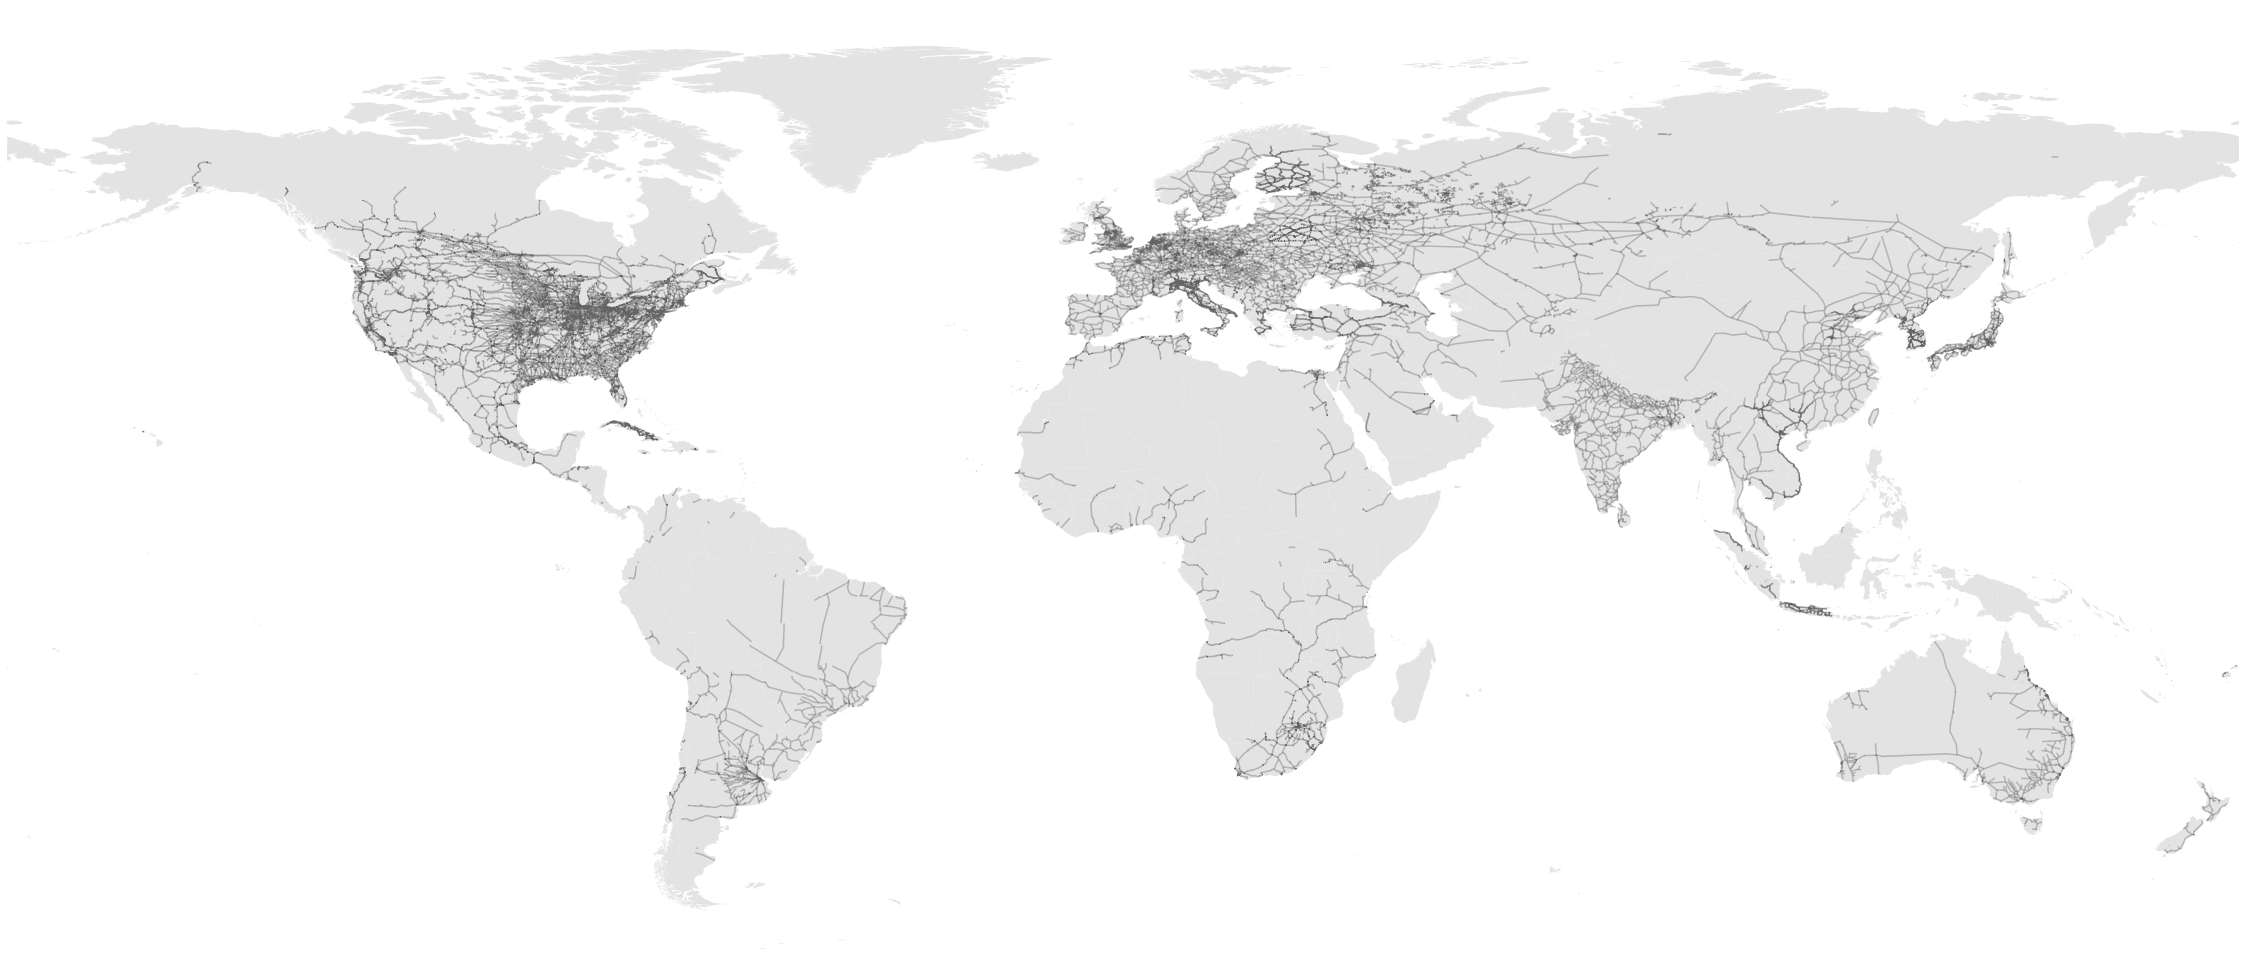

In [32]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')

# plot edges
edge_gdf[(edge_gdf['start_type']=='railway') & (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf[(edge_gdf['start_type']=='shipping') & (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
#fig.savefig('coal_supplynetwork.png')

plt.show()

In [33]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6..."
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6..."
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6..."
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)"
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)"
...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1..."
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1..."
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1..."
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1..."


**do nodes df**

In [34]:
node_df = pd.DataFrame.from_records([{'node':n[0],'D':n[1]['D']} for n in gen.G.nodes(data=True)])

In [35]:
node_df = node_df.merge(all_nodes, how='left',left_on='node',right_on='node_ID')

In [36]:
node_df = node_df[node_df.node!='supersource']

In [37]:
node_df['geometry'] = node_df['coordinates'].apply(json.loads).apply(geometry.Point)

In [38]:
node_gdf = gpd.GeoDataFrame(node_df, geometry=node_df['geometry'], crs = {'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [39]:
node_gdf['type']=node_gdf['node'].str.split('_').str[0]

In [40]:
node_gdf

,node,D,node_ID,coordinates,geometry,type
0,coal_mine_1920,0,coal_mine_1920,"[25.917000000186725, -24.666999999954218]",POINT (25.91700 -24.66700),coal
1,railway_node_25.9047571-24.6667781,0,railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]",POINT (25.90476 -24.66678),railway
2,coal_mine_1922,0,coal_mine_1922,"[53.394000000101364, 35.57499999971285]",POINT (53.39400 35.57500),coal
3,railway_node_53.3958054211536635.55213928019969,0,railway_node_53.3958054211536635.55213928019969,"[53.39580542115366, 35.55213928019969]",POINT (53.39581 35.55214),railway
4,coal_mine_1923,0,coal_mine_1923,"[52.98099999974161, 36.17099999993142]",POINT (52.98100 36.17100),coal
...,...,...,...,...,...,...
1057524,city_node_9970,9,city_node_9970,"[9.140014958055534, 12.218561270578235]",POINT (9.14001 12.21856),city
1057525,city_node_9981,6,city_node_9981,"[6.893405117769672, 11.846367254346195]",POINT (6.89341 11.84637),city
1057526,city_node_9989,16,city_node_9989,"[13.147584159650059, 11.766774687687745]",POINT (13.14758 11.76677),city
1057527,city_node_9990,75,city_node_9990,"[8.593431162223446, 12.00241287418524]",POINT (8.59343 12.00241),city


In [41]:
node_gdf['type'].unique()

array(['coal', 'railway', 'port', 'shipping', 'power', 'city'],
      dtype=object)

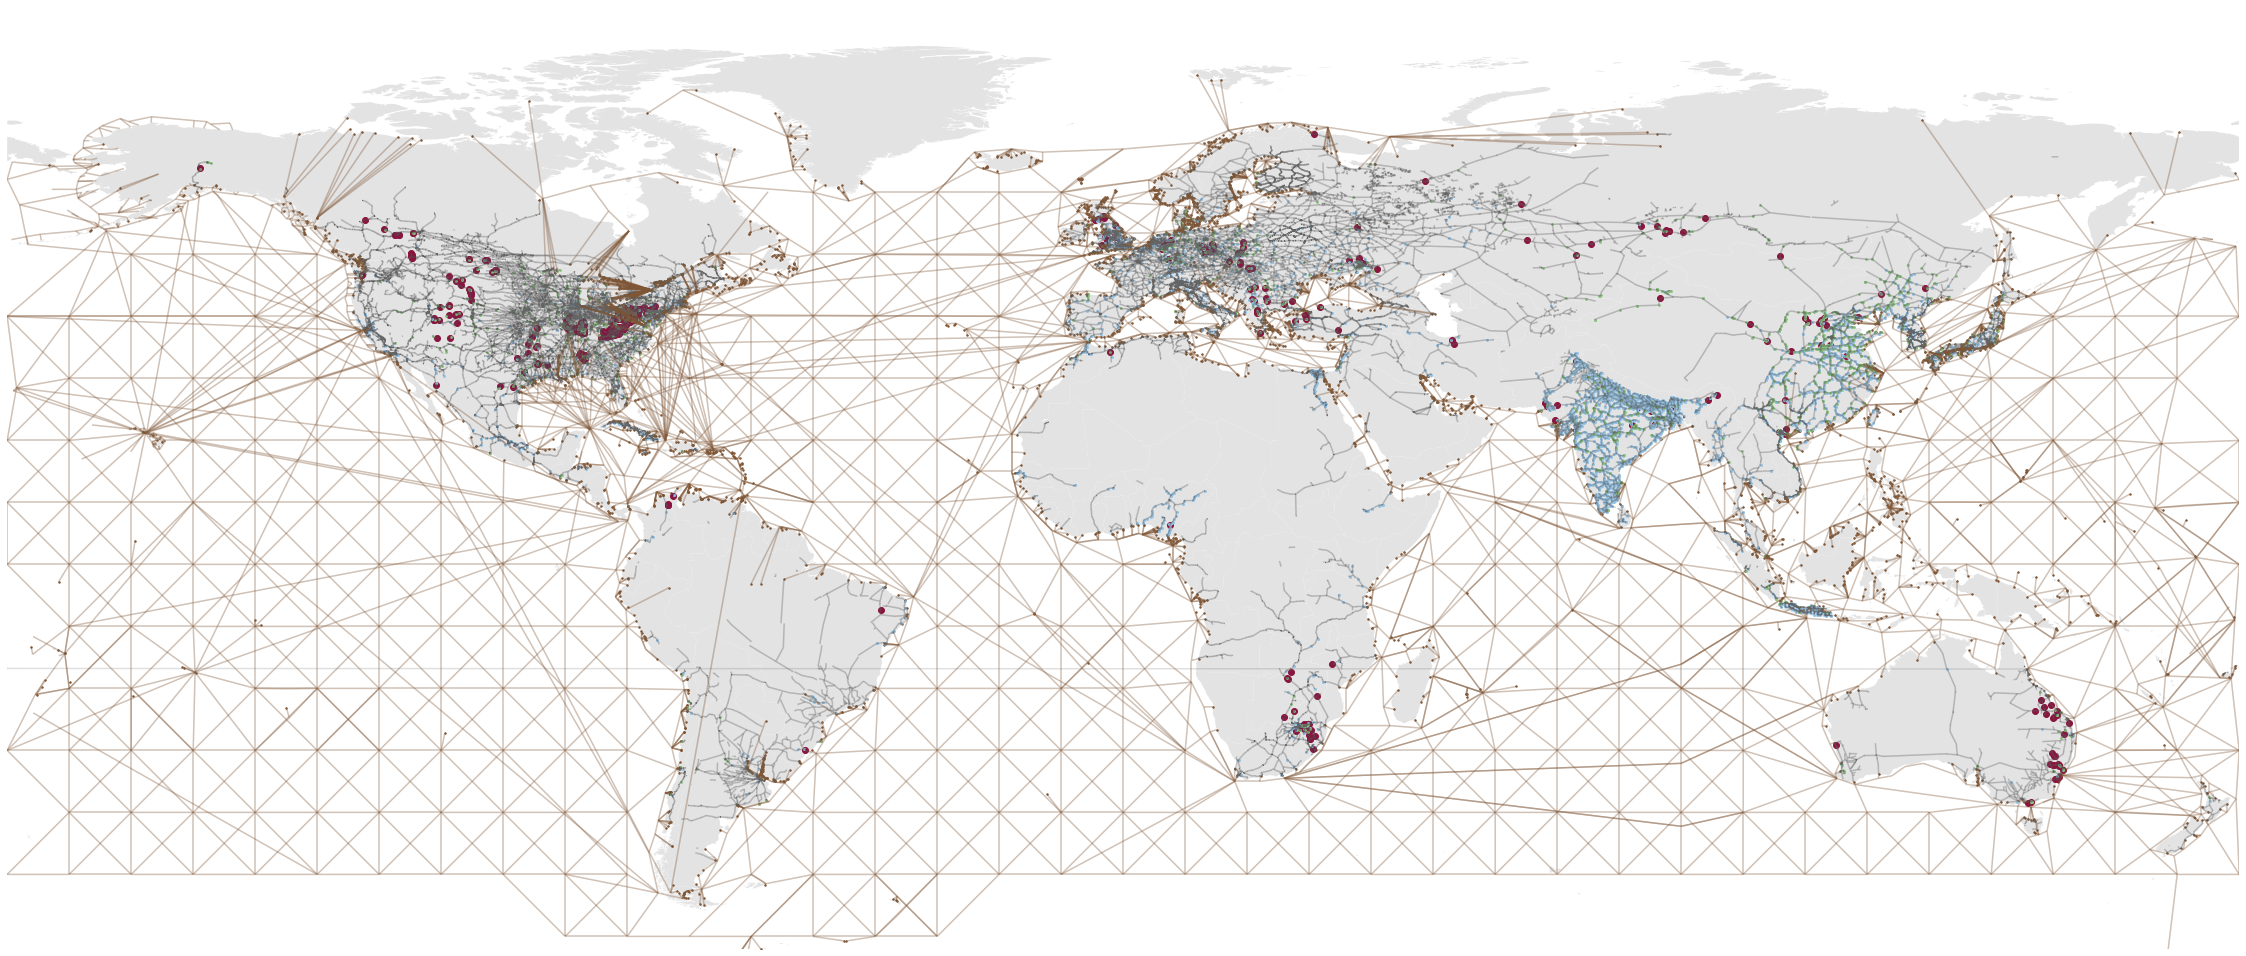

In [42]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# plot edges
edge_gdf[(edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
edge_gdf[(edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('coal_supplynetwork.png')

plt.show()

### Force-Directed Layout

Out of memory error... loolll
... try again once having run community detection

In [173]:
edge_df['z_inv'] = 1/(edge_df['z']+1)

In [184]:
len(node_df.node.unique())

1024383

In [189]:
# get pos as dict
pos = node_df.drop_duplicates(subset='node')[['node','coordinates']].set_index('node').to_dict('index')

In [190]:
pos = {kk:json.loads(vv['coordinates']) for kk, vv in pos.items()}

In [193]:
z_inv_attr = edge_df[['start','end','z_inv']].set_index(['start','end']).to_dict(orient='index')

In [194]:
nx.set_edge_attributes(gen.G, z_inv_attr)

In [196]:
# pos = nx.spring_layout(gen.G, pos, iterations=1, weight='z_inv')
# big ole 'out of memory' error

### load flows and visualise them

In [43]:
flow_dict = pickle.load(open('./../coal_flow_dict.pkl','rb'))

In [44]:
len(flow_dict.keys())

1031171

In [53]:
flow_dict_reshape = {(i,j): flow_dict[i][j] 
                           for i in flow_dict.keys() 
                           for j in flow_dict[i].keys()}

In [54]:
flow_dict_reshape

{('coal_mine_1920', 'railway_node_25.9047571-24.6667781'): 14684,
 ('railway_node_25.9047571-24.6667781',
  'railway_node_25.9047571-24.6664075'): 14684,
 ('railway_node_25.9047571-24.6667781',
  'railway_node_25.9047254-24.6670633'): 0,
 ('coal_mine_1922', 'railway_node_53.3958054211536635.55213928019969'): 4677,
 ('railway_node_53.3958054211536635.55213928019969',
  'railway_node_53.38116831558798535.542777921444795'): 4570,
 ('railway_node_53.3958054211536635.55213928019969',
  'railway_node_53.4143905469255735.55813984128466'): 107,
 ('coal_mine_1923', 'railway_node_52.97519310345878636.17194361255421'): 301,
 ('railway_node_52.97519310345878636.17194361255421',
  'railway_node_52.9916115331686136.16469565131024'): 0,
 ('railway_node_52.97519310345878636.17194361255421',
  'railway_node_52.9547501069948936.182582800548694'): 301,
 ('coal_mine_1926', 'railway_node_-2.18300434.3093436'): 100505,
 ('railway_node_-2.18300434.3093436',
  'railway_node_-2.186293834.3087238'): 100505,
 ('

In [55]:
flow_df = pd.DataFrame.from_dict(flow_dict_reshape, orient='index')

In [82]:
flow_df['source']=flow_df.index.str[0]

In [84]:
flow_df = flow_df[~(flow_df.source=='supersource')]

In [88]:
flow_df = flow_df.rename(columns={0:'flow'})

In [89]:
flow_df

,flow,source
"(coal_mine_1920, railway_node_25.9047571-24.6667781)",14684,coal_mine_1920
"(railway_node_25.9047571-24.6667781, railway_node_25.9047571-24.6664075)",14684,railway_node_25.9047571-24.6667781
"(railway_node_25.9047571-24.6667781, railway_node_25.9047254-24.6670633)",0,railway_node_25.9047571-24.6667781
"(coal_mine_1922, railway_node_53.3958054211536635.55213928019969)",4677,coal_mine_1922
"(railway_node_53.3958054211536635.55213928019969, railway_node_53.38116831558798535.542777921444795)",4570,railway_node_53.3958054211536635.55213928019969
...,...,...
"(shipping_node_34564, shipping_node_34768)",0,shipping_node_34564
"(shipping_node_34564, shipping_node_33992)",0,shipping_node_34564
"(shipping_node_33992, shipping_node_34564)",0,shipping_node_33992
"(shipping_node_33992, shipping_node_34768)",0,shipping_node_33992


In [57]:
edge_df = edge_df.set_index(['start','end'])

In [45]:
edge_df['flow']=0

In [66]:
edge_df

z  \
start                                           end                                                       
coal_mine_1920                                  railway_node_25.9047571-24.6667781                    0   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                    0   
                                                railway_node_25.9047254-24.6670633                    0   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969       0   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795     0   
...                                                                                                 ...   
shipping_node_34564                             shipping_node_34768                                1212   
                                                shipping_node_33992                                 508   
shipping_node_33992                             shipping_node_34564                                 508   
                                                shipping_node_34768                                  49   
shipping_node_125192                            shipping_node_125717                                712   

                                                                                                  start_type  \
start                                           end                                                            
coal_mine_1920                                  railway_node_25.9047571-24.6667781                      coal   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                   railway   
                                                railway_node_25.9047254-24.6670633                   railway   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969         coal   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795    railway   
...                                                                                                      ...   
shipping_node_34564                             shipping_node_34768                                 shipping   
                                                shipping_node_33992                                 shipping   
shipping_node_33992                             shipping_node_34564                                 shipping   
                                                shipping_node_34768                                 shipping   
shipping_node_125192                            shipping_node_125717                                shipping   

                                                                                                   end_type  \
start                                           end                                                           
coal_mine_1920                                  railway_node_25.9047571-24.6667781                  railway   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                  railway   
                                                railway_node_25.9047254-24.6670633                  railway   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969     railway   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795   railway   
...                                                                                                     ...   
shipping_node_34564                             shipping_node_34768                                shipping   
                                                shipping_node_33992                                shipping   
shipping_node_33992                             shipping_node_34564                                shipping   
                                

In [90]:
edge_df.loc[flow_df.index, 'flow'] = flow_df['flow']

In [91]:
edge_df.flow.sum()

14771218517

In [93]:
edge_df = edge_df.reset_index()

In [236]:
edge_df = edge_df[edge_df['start']!='supersource']

In [237]:
edge_df

,start,end,z,start_type,end_type,snode_ID,start_coordinates,enode_ID,end_coordinates,geometry,z_inv,flow
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0.0,coal,railway,coal_mine_1920,"[25.917000000186725, -24.666999999954218]",railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6...",1.000000,749850.0
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0.0,railway,railway,railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]",railway_node_25.9047571-24.6664075,"[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6...",1.000000,749850.0
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0.0,railway,railway,railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]",railway_node_25.9047254-24.6670633,"[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6...",1.000000,0.0
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0.0,coal,railway,coal_mine_1922,"[53.394000000101364, 35.57499999971285]",railway_node_53.3958054211536635.55213928019969,"[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)",1.000000,0.0
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0.0,railway,railway,railway_node_53.3958054211536635.55213928019969,"[53.39580542115366, 35.55213928019969]",railway_node_53.38116831558798535.542777921444795,"[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)",1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2243990,shipping_node_34564,shipping_node_34768,707.0,shipping,shipping,shipping_node_34564,"[-70.69139099, 43.13928986]",shipping_node_34768,"[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1...",0.001412,0.0
2243991,shipping_node_34564,shipping_node_33992,297.0,shipping,shipping,shipping_node_34564,"[-70.69139099, 43.13928986]",shipping_node_33992,"[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1...",0.003356,0.0
2243992,shipping_node_33992,shipping_node_34564,297.0,shipping,shipping,shipping_node_33992,"[-70.71349335, 43.17829895]",shipping_node_34564,"[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1...",0.003356,0.0
2243993,shipping_node_33992,shipping_node_34768,29.0,shipping,shipping,shipping_node_33992,"[-70.71349335, 43.17829895]",shipping_node_34768,"[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1...",0.033333,0.0


### Visualise flow

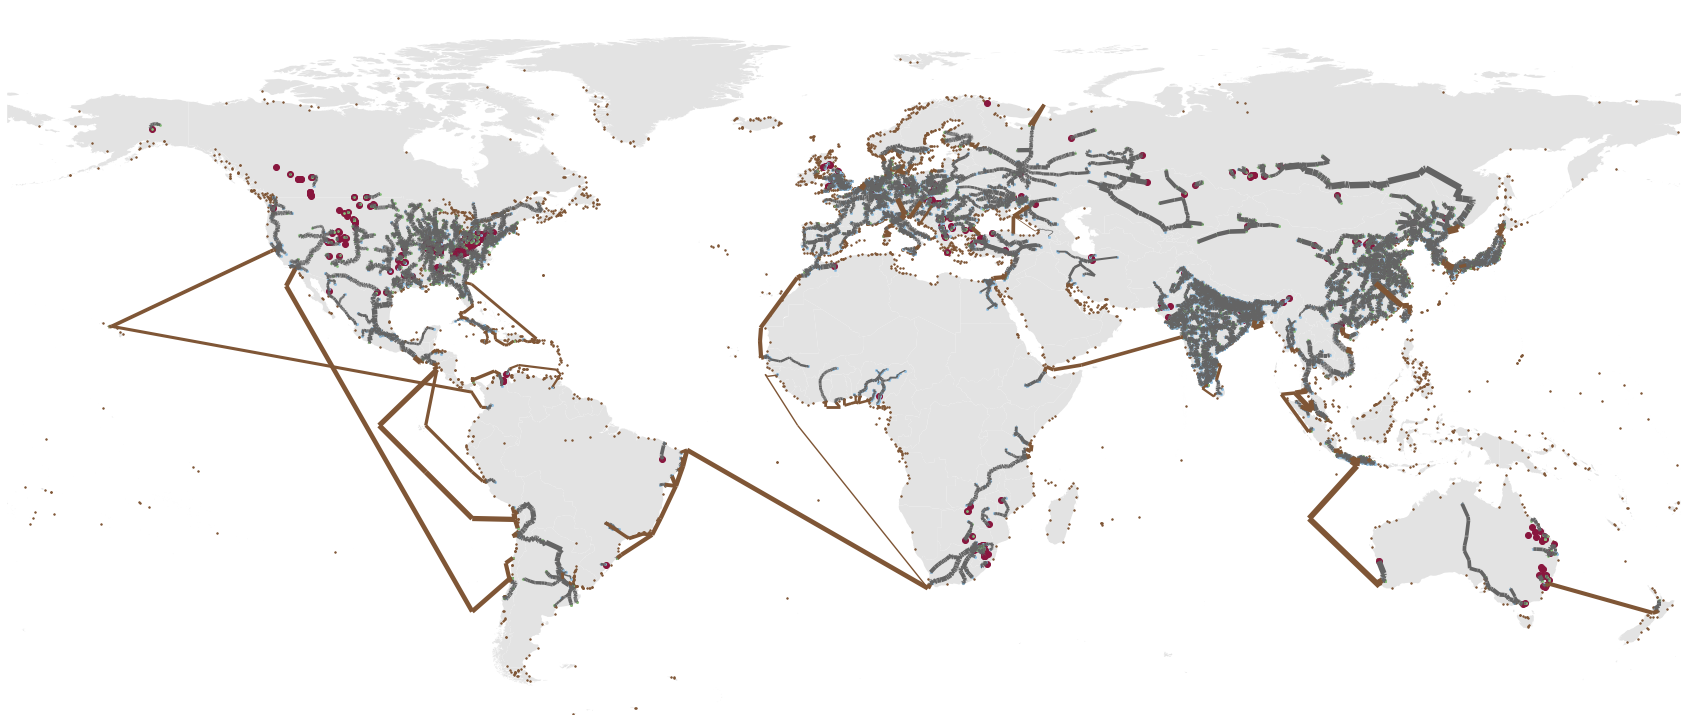

In [95]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(30,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# plot edges
segs = []
line_widths=[]
line_colors = []

for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway'))].iterrows():
    segs.append(list(edge[1]['geometry'].coords))
    line_widths.append(np.log10(edge[1]['flow']))
    line_colors.append(colors['railways'])
    
for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping'))].iterrows():
    segs.append(list(edge[1]['geometry'].coords))
    line_widths.append(np.log10(edge[1]['flow']))
    line_colors.append(colors['shipping'])

line_collection = LineCollection(segs, linewidths=line_widths, colors=line_colors)
    
ax.add_collection(line_collection)
    
ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('coal_flownetwork.png')

plt.show()

In [96]:
print(1.03 + 1.51 +1.50)
print (2.25 + 3.68 +3.67)


4.04
9.6


### Check pipelines

In [247]:
pipelines_df = pd.read_csv(all_data_dirs['pipelines-pipelines'])

In [248]:
all_nodes

,node_ID,coordinates
0,city_node_0,"[70.3302479906805, 37.76840637200007]"
1,city_node_1,"[69.91406604103679, 36.969858182710496]"
2,city_node_2,"[73.55249175449624, 37.13755340600005]"
3,city_node_3,"[68.66072971923218, 36.93501161119775]"
4,city_node_4,"[69.80669794370749, 36.44594427548354]"
...,...,...
9840,well_pad_9840,"[-90.87808476912353, 28.839718754622925]"
9841,well_pad_9841,"[-90.82512218382949, 28.87361665367242]"
9842,well_pad_9842,"[-91.08767461854396, 28.29956690464191]"
9843,well_pad_9843,"[-91.45741329506177, 28.244583012809247]"


In [249]:
pipelines_df = pipelines_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left', left_on='StartNodeId:START_ID(PipelineNode)', right_on='node_ID')

In [251]:
pipelines_df = pipelines_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left', left_on='EndNodeId:END_ID(PipelineNode)', right_on='node_ID')

In [270]:
pipelines_df[pipelines_df['coordinates_x'].isna()]

,Unnamed: 0,StartNodeId:START_ID(PipelineNode),EndNodeId:END_ID(PipelineNode),:TYPE,distance,impedance,node_ID_x,coordinates_x,node_ID_y,coordinates_y
829770,829770,p,p,PIPELINE_CONNECTION,0.037871,0.001434,NaN,NaN,NaN,NaN
829771,829771,p,p,PIPELINE_CONNECTION,0.002931,0.000009,NaN,NaN,NaN,NaN
829772,829772,p,p,PIPELINE_CONNECTION,0.700764,0.491070,NaN,NaN,NaN,NaN
829773,829773,p,p,PIPELINE_CONNECTION,0.698063,0.487292,NaN,NaN,NaN,NaN
829774,829774,p,p,PIPELINE_CONNECTION,0.786355,0.618355,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
949057,949057,pipe_node_-95.9655529999953732.16205900040267,pipe_node_-95.9660980000065332.16205900040267,PIPELINE_CONNECTION,0.666440,0.444142,NaN,NaN,pipe_node_-95.9660980000065332.16205900040267,"[-95.96609800000653, 32.16205900040267]"
949058,949058,pipe_node_149.0514016985759-25.892028915095715,pipe_node_149.06160953568602-25.88570218712019,PIPELINE_CONNECTION,7.407408,54.869691,NaN,NaN,NaN,NaN
949059,949059,pipe_node_-98.6572359994168635.829345999964104,pipe_node_-98.6523850000740635.82432100011652,PIPELINE_CONNECTION,2.657773,7.063756,NaN,NaN,NaN,NaN
949062,949062,pipe_node_-102.842322773856247.6827577456162,pipe_node_-102.8786673640261947.62329886400613,PIPELINE_CONNECTION,11.690045,136.657143,NaN,NaN,NaN,NaN


In [ ]:
pipe_node_-102.842322773856247.6827577456162	

In [273]:
mm = 'pipe_node_-95.965'
len(mm)

17

In [274]:
all_nodes[all_nodes['node_ID'].str[:17]==mm]

,node_ID,coordinates
64629,pipe_node_-95.9657560004607929.522648000294154,"[-95.96575600046079, 29.522648000294154]"
64630,pipe_node_-95.9657100005314334.960062999951376,"[-95.96571000053143, 34.960062999951376]"
64631,pipe_node_-95.9656130003360329.592172999715494,"[-95.96561300033603, 29.592172999715494]"
64632,pipe_node_-95.965567999503534.546815999726135,"[-95.9655679995035, 34.546815999726135]"
64633,pipe_node_-95.9655110000103435.46322299995385,"[-95.96551100001034, 35.46322299995385]"
64634,pipe_node_-95.9655066406955727.88224352008478,"[-95.96550664069557, 27.88224352008478]"
64635,pipe_node_-95.9651100005625928.902147000184748,"[-95.96511000056259, 28.902147000184748]"


In [214]:
dd = {'meow':{'a':2,'b':5},'woof':{'b':7,'d':6}}

In [215]:
a = pd.DataFrame.from_dict(dd, orient='index')

In [216]:
a=a.unstack()

In [218]:
a[a>0].reset_index()

,level_0,level_1,0
0,a,meow,2.0
1,b,meow,5.0
2,b,woof,7.0
3,d,woof,6.0


In [226]:
for ii_k, (kk, vv) in enumerate(flow_dict.items()):
    if ii_k%2500==0:
        print (ii_k)
    for kk2, flowval in vv.items():
        if flowval>0:
            edge_df.loc[(kk,kk2),'flow'] = flowval

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000
82500
85000
87500
90000
92500
95000
97500
100000
102500
105000
107500
110000
112500
115000
117500
120000
122500
125000
127500
130000
132500
135000
137500
140000
142500
145000
147500
150000
152500
155000
157500
160000
162500
165000
167500
170000
172500
175000
177500
180000
182500
185000
187500
190000
192500
195000
197500
200000
202500
205000
207500
210000
212500
215000
217500
220000
222500
225000
227500
230000
232500
235000
237500
240000
242500
245000
247500
250000
252500
255000
257500
260000
262500
265000
267500
270000
272500
275000
277500
280000
282500
285000
287500
290000
292500
295000
297500
300000
302500
305000
307500
310000
312500
315000
317500
320000
322500
325000
327500
330000
332500
335000
337500
340000
342500
345000
347500
350000
352500
355000
357500
360000
362500
365000
367500
370000
3725

KeyboardInterrupt: 